In [1]:
import pandas as pd

In [2]:
claims_df = pd.read_csv('HWA-Brovsi-WSA-Claims-Validated.csv')

/Users/senhmo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
claims_df.head()

,EMP_ID,CLM_SYS,CLM_REF,WSA_TYP,FLEXBEN_TYPE,CLM_DT,CLM_YR,CLM_AMT,RCPT_DT,RCPT_DAY,DAY_TAG,CLM.STAT,REIMB_DT,REIMB_YR,EA_DT,RISK
0,11869,WSA,EFSA0087162,FLXI,5.0,4/11/16,2016,492.0,29/9/16,Thursday,WEEKDAY,3,3/1/17,2017,21/9/17,1
1,8965,WSA,EFSA0087207,FLXI,4.0,9/11/16,2016,471.0,30/9/16,Friday,WEEKDAY,3,3/1/17,2017,21/9/17,1
2,8998,WSA,EFSA0087210,FLXI,6.0,9/11/16,2016,496.0,30/9/16,Friday,WEEKDAY,3,7/1/17,2017,21/9/17,1
3,2098,WSA,EFSA0087208,FLXI,2.0,9/11/16,2016,464.0,3/10/16,Monday,WEEKDAY,3,5/1/17,2017,21/9/17,1
4,9331,WSA,EFSA0087236,FLXI,2.0,11/11/16,2016,454.0,6/10/16,Thursday,WEEKDAY,3,2/1/17,2017,21/9/17,1


In [4]:
for each_column in claims_df.columns:
    print(each_column, claims_df[each_column].isna().sum())

EMP_ID 0
CLM_SYS 0
CLM_REF 0
WSA_TYP 0
FLEXBEN_TYPE 16758
CLM_DT 0
CLM_YR 0
CLM_AMT 0
RCPT_DT 0
RCPT_DAY 0
DAY_TAG 0
CLM.STAT 0
REIMB_DT 0
REIMB_YR 0
EA_DT 5109
RISK 0


In [5]:
claims_df_nona = claims_df.dropna()

In [6]:
for each_column in claims_df_nona.columns:
    print(each_column, claims_df_nona[each_column].isna().sum())

EMP_ID 0
CLM_SYS 0
CLM_REF 0
WSA_TYP 0
FLEXBEN_TYPE 0
CLM_DT 0
CLM_YR 0
CLM_AMT 0
RCPT_DT 0
RCPT_DAY 0
DAY_TAG 0
CLM.STAT 0
REIMB_DT 0
REIMB_YR 0
EA_DT 0
RISK 0


In [7]:
X = claims_df_nona.drop(['RISK'], axis=1)
X = pd.get_dummies(X)
y = claims_df_nona['RISK']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=.2)

In [9]:
from sklearn.neural_network import MLPClassifier
nnclass = MLPClassifier(activation='logistic',max_iter=500,verbose=False)

In [10]:
nnclass.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
y_pred = nnclass.predict(X_test)

In [12]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
acc

77.62662807525325

In [14]:
train_sizes = [43,50,100,250,500,750,1000,3000,5400]

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [16]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = nnclass,X=X,
y=y, train_sizes = train_sizes, cv = 3,scoring='accuracy')

In [17]:
# Cross validation based training and test scores 

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.81395349 0.86046512 0.88372093]
 [0.82       0.8        0.76      ]
 [0.79       0.75       0.71      ]
 [0.764      0.692      0.692     ]
 [0.75       0.732      0.732     ]
 [0.77333333 0.76266667 0.76266667]
 [0.775      0.775      0.775     ]
 [0.76933333 0.78366667 0.78366667]
 [0.77648148 0.77944444 0.77944444]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.7799201  0.53916971 0.472642  ]
 [0.7799201  0.56279312 0.53951711]
 [0.7799201  0.53291645 0.52440507]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]
 [0.7799201  0.7800938  0.7800938 ]]


In [18]:
# Calculate mean values of scores to plot
import numpy as np
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 43      0.852713
50      0.793333
100     0.750000
250     0.716000
500     0.738000
750     0.766222
1000    0.775000
3000    0.778889
5400    0.778457
dtype: float64

 --------------------

Mean validation scores

 43      0.597244
50      0.627410
100     0.612414
250     0.780036
500     0.780036
750     0.780036
1000    0.780036
3000    0.780036
5400    0.780036
dtype: float64


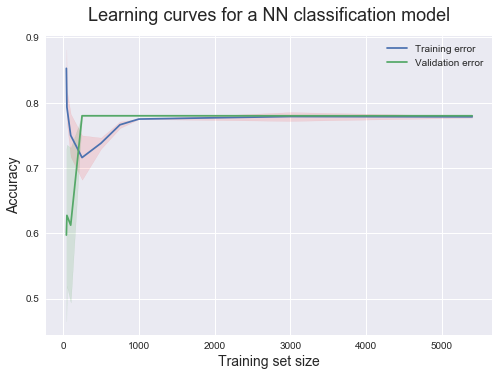

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a NN classification model', fontsize = 18, y = 1.03)
plt.legend()
# plt.ylim(0.6,.9)
plt.show()

In [20]:
claim_extrapolated_df = pd.read_csv('HWA-Brovsi-WSA-Claims.csv')
claim_extrapolated_nona_df = claim_extrapolated_df.dropna()
claim_extrapolated_nona_df=pd.get_dummies(claim_extrapolated_nona_df)
y_pred2 = nnclass.predict(claim_extrapolated_nona_df)

/Users/senhmo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
